# Equipo Draco

*Paulina Yasaret Chávez Roldán A017516961

Ainhara Itzae Mejia Rivera A01745041

Ximena Montserrat Sánchez Rubio A01378326

Lesly Carolina Guerrero Veléz A01753039

José María Ibarra A01706970

Santiago Soriano Orduña A01745432

Queremos crear una "ciudad" con distribución de personas diferente. Con $\bf{D}$ indicamos el "tamaño" de la ciudad y con $\bf{N}$ el número de personas de la ciudad.

In [ ]:
N = 300  
D = 100

La simulación se puede hacer en equipo, sólo en la primera actividad, donde se crea la "ciudad", cada miembro del equipo elige una ciudad diferente. Si el grupo está formado por más que 4 personas, dos personas pueden trabajar juntas.


###Ciudad cuadrada distribución uniforme LESLY Y PAU


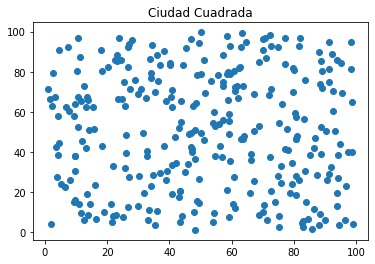

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)

#### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
#### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad
xpos = np.random.uniform(1,D,N)
ypos = np.random.uniform(1,D,N)

plt.title("Ciudad Cuadrada")
plt.scatter(xpos,ypos) #Plot para visualizar las personas

###Ciudad circular distribución uniforme  XIME Y AINHARA


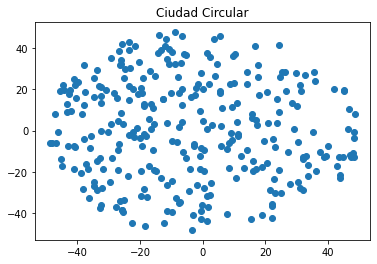

In [ ]:
import math
d = np.random.uniform(0,1,N)
R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N) * (2*math.pi)
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R*np.sqrt(d)

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r*np.cos(alpha)
ypos = r*np.sin(alpha)
plt.title("Ciudad Circular")
plt.scatter(xpos,ypos)

###Ciudad cuadrada distribución en cluster SANTIAGO


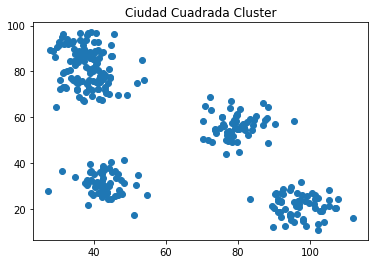

In [ ]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
### Usar como límites los límites de la ciudad
x0 = np.random.uniform(0,D,n_clusters)
y0 = np.random.uniform(0,D,n_clusters)

###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
   xpos[i] = np.random.normal(x0[i], D/20, nn)
   ypos[i] = np.random.normal(y0[i], D/20, nn)

##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.title("Ciudad Cuadrada Cluster")
plt.scatter(xpos,ypos)

###Ciudad circular distribución en cluster

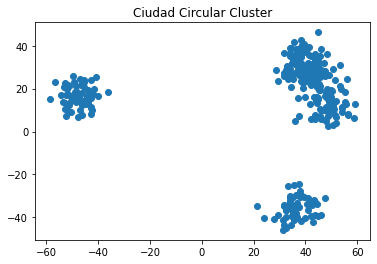

In [ ]:
import math
import numpy as np

n_clusters = 5 #Para seleccionar el número de clusters
nn = N // n_clusters

R = D/2 #radio

##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
alpha = np.random.uniform(D,1,N)*2*math.pi

### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a cartesianas
x0 = R*np.cos(alpha)
y0 = R*np.sin(alpha)
# ### Se crean arrays para las posiciones
xpos = np.zeros((n_clusters,nn))
ypos = np.zeros((n_clusters,nn))

# ### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
# ### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
# ### que tenga media igual a y0[i] y desviación estándar igual a D/20.
for i in range(n_clusters):
   xpos[i] = np.random.normal(x0[i], D/20, nn)
   ypos[i] = np.random.normal(y0[i], D/20, nn)
# ###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

plt.title("Ciudad Circular Cluster")
plt.scatter(xpos,ypos)


In [ ]:
#Definimos la condición (status) de las personas como "susceptible", "infected","recovered","dead" 


#Condiciones iniciales:
I0  = 2 #número infectados inicial
R0 = 1 #número recuperados inicial
D0 = 1 #número muertos inicial
S0 = N-I0-D0-R0 #Número de susceptibles inicial

infection_radius = 0.6  #distancia para decidir si una persona se infecta o no
recovery_rate = 0.0006
death_rate = 0.001

### Definir un array donde aparezca un número de elementos "susceptible" igual a S0, un número de elementos "infected" igual a I0,
### un número de elementos "recovered" igual a R0 y un número de elementos "dead" igual a D0
## Sug.:usar np.repeat()

status = np.repeat(['susceptible','infected','recovered','dead'],[S0, I0, R0, D0])

### Crear un array de N elementos iguales a 0 (usar np.repeat())
iteration = np.repeat(0,N)
### Crear un array de N elementos que contenga valores de 1 a N
id = np.arange(1, N+1, 1) 
# print(status)
# print(iteration)
# print(id)

In [ ]:
## Aquí se crea un dataframe con las columnas 'xpos', 'ypos', 'status','iteration' y 'id'
df = pd.DataFrame()
df['xpos']=xpos
df['ypos']=ypos
df['status']=status
df['status'] = df['status'].astype('category')
df['iteration']=iteration
df['id']=id
df.head(10)

,xpos,ypos,status,iteration,id
0,47.578241,16.451066,susceptible,0,1
1,48.975659,13.796088,susceptible,0,2
2,37.041438,15.676221,susceptible,0,3
3,48.735131,7.362062,susceptible,0,4
4,46.157281,10.084120,susceptible,0,5
5,47.309830,10.048836,susceptible,0,6
6,42.218088,6.020308,susceptible,0,7
7,43.841815,7.728363,susceptible,0,8
8,48.146021,11.407374,susceptible,0,9
9,50.312112,12.613750,susceptible,0,10


In [ ]:
## Escribir una función que mide la distancia euclidiana entre dos puntos A=(x1,y1) y B=(x2,y2) y 
###regresa True si la distancia es menor que el radio de infección "infection_radius" definido arriba

#usando los primeros dos puntos del dataframe
def infec(A, B):
  distComp=[0, 0]
  distComp[0]=B[0]-A[0]
  distComp[1]=B[1]-A[1]
  d =math.sqrt(pow(distComp[0], 2) + pow(distComp[1], 2))
  #print('Distancia: ', d)
  if (d<infection_radius):
    b = True
  else:
    b = False
  return b




# FASE 4 

Para correr la animación en cada una de las ciudades es necesario poner su código y dejar como comentario el resto de ciudades. Luego se ejecuta todo el cuaderno para obtener la animación sin errores de acumulación de datos en los arrays.

In [ ]:
# N = 300  
# D = 100
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# pd.set_option('display.max_rows', None)

# #### Crear los arrays xpos, ypos usando np.random.uniform() que representan las coordinadas (xpos,ypos) de las N personas
# #### Pueden elegir los valores límite considerando que las N personas deben quedarse adentro de la ciudad
# xpos = np.random.uniform(1,D,N)
# ypos = np.random.uniform(1,D,N)

# plt.title("Ciudad Cuadrada")
# plt.scatter(xpos,ypos) #Plot para visualizar las personas

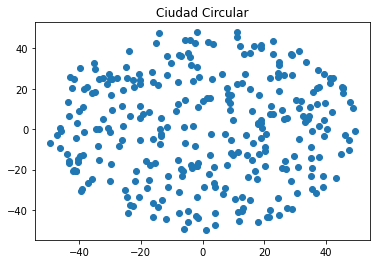

In [ ]:
import math
d = np.random.uniform(0,1,N)
R = D/2 #radio de la distribución

### Generar N valores aleatorios entre 0 y 1 con la función np.random.uniform() y multiplicarlos por 2*math.pi
### para generar valores aleatorios de ángulos entre 0 y 2*Pi
alpha = np.random.uniform(0,1,N) * (2*math.pi)
### Generar N valores del radio r como R*np.sqrt(d), donde d son N aleatorios entre 0 y 1 generados con np.random.uniform()
### Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
r = R*np.sqrt(d)

### Convertir de coordenadas polares a cartesianas para generar las posiciones (xpos, ypos) de las N personas
xpos = r*np.cos(alpha)
ypos = r*np.sin(alpha)
plt.title("Ciudad Circular")
plt.scatter(xpos,ypos)

In [ ]:
# import math
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# n_clusters = 5 #Para seleccionar el número de clusters
# nn = N // n_clusters

# ### Usando np.random.uniform() generar las coordenadas de centro (x0,y0) de cada cluster (en número igual a n_clusters)
# ### Usar como límites los límites de la ciudad
# x0 = np.random.uniform(0,D,n_clusters)
# y0 = np.random.uniform(0,D,n_clusters)

# ###Aquí abajo se crean los arrays vacíos para las posiciones (xpos,ypos) de las N personas
# xpos = np.zeros((n_clusters,nn))
# ypos = np.zeros((n_clusters,nn))

# ### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
# ### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
# ### que tenga media igual a y0[i] y desviación estándar igual a D/20.
# for i in range(n_clusters):
#    xpos[i] = np.random.normal(x0[i], D/20, nn)
#    ypos[i] = np.random.normal(y0[i], D/20, nn)

# ##En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
# xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
# ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

# plt.title("Ciudad Cuadrada Cluster")
# plt.scatter(xpos,ypos)

In [ ]:
# import math
# import numpy as np

# n_clusters = 5 #Para seleccionar el número de clusters
# nn = N // n_clusters

# R = D/2 #radio

# ##Generar aleatorios con distribución uniforme entre 0 y 1 (en número igual a n_clusters) 
# ##para el ángulo de cada cluster usando np.random.uniform() y multiplicándolo por 2*math.pi
# alpha = np.random.uniform(D,1,N)*2*math.pi

# ### Generar los radios r como R*np.sqrt(d), donde d son aleatorios con distribución uniforme (en número igual a n_clusters) entre 0 y 1
# ###Se usa la raíz cuadrada para generar una distribución circular uniforme, si no saldría una distribución con aros concéntricos.
# r = R * np.sqrt(np.random.uniform(0,1,n_clusters))

# ### Calcular las posiciones del centro de cada clusters convirtiendo de coordenadas polares a cartesianas
# x0 = R*np.cos(alpha)
# y0 = R*np.sin(alpha)
# # ### Se crean arrays para las posiciones
# xpos = np.zeros((n_clusters,nn))
# ypos = np.zeros((n_clusters,nn))

# # ### Por cada cluster (índice i),generar nn valores aleatorios xpos con distribución normal, usando np.random.normal(), 
# # ### que tenga media igual a x0[i] y desviación estándar igual a D/20. Generar nn valores aleatorios ypos con distribución normal, usando np.random.normal(), 
# # ### que tenga media igual a y0[i] y desviación estándar igual a D/20.
# for i in range(n_clusters):
#    xpos[i] = np.random.normal(x0[i], D/20, nn)
#    ypos[i] = np.random.normal(y0[i], D/20, nn)
# # ###En las líneas abajo se unen todos los xpos[i] y ypos[i] para crear un único array de xpos y ypos
# xpos = np.reshape(xpos,(xpos.shape[0]*xpos.shape[1],))
# ypos = np.reshape(ypos,(ypos.shape[0]*ypos.shape[1],))

# plt.title("Ciudad Circular Cluster")
# plt.scatter(xpos,ypos)

In [ ]:
#numero de iteraciones 
num_it = 10
#ciclo


for i in range(1,num_it):
  actual = df.loc[df['iteration']==i-1,:]
  infectados = df.loc[(df['iteration']==i-1) & (df['status']=='infected'),:]

  xpos_change = 0.5*np.random.normal(0,1,xpos.shape)    #to simulate the movement of person
  ypos_change = 0.5*np.random.normal(0,1,xpos.shape)
 
  xpos = xpos+xpos_change
  ypos = ypos+ypos_change
  actual['xpos'] = xpos
  actual['ypos'] = ypos

  for k in range(len(infectados)):
    for j in range(len(actual)):
       A=[actual.iloc[j,0],actual.iloc[j,1]]
       B=[infectados.iloc[k,0],infectados.iloc[k,1]]

       if infec(A, B) == True: 
         actual.iloc[j,2]= "infected"

  actual["iteration"]= i
  df = df.append(actual)         
  df.reset_index(drop=True, inplace=True)

#animación  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
df.head(10)

,xpos,ypos,status,iteration,id
0,47.578241,16.451066,susceptible,0,1
1,48.975659,13.796088,susceptible,0,2
2,37.041438,15.676221,susceptible,0,3
3,48.735131,7.362062,susceptible,0,4
4,46.157281,10.084120,susceptible,0,5
5,47.309830,10.048836,susceptible,0,6
6,42.218088,6.020308,susceptible,0,7
7,43.841815,7.728363,susceptible,0,8
8,48.146021,11.407374,susceptible,0,9
9,50.312112,12.613750,susceptible,0,10


In [ ]:
import plotly.express as px
px.scatter(df, x="xpos", y="ypos", animation_frame="iteration", color="status", hover_name="status",color_discrete_sequence=px.colors.qualitative.Safe)
